In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = './data/creatures_EDL.csv'
df = pd.read_csv(file_path)

# Create a new DataFrame with 21600 rows
new_df = pd.DataFrame(index=np.arange(21600), columns=["Creatures"])

# Initialize "Creatures" column with 0
new_df["Creatures"] = 0

# Get the 'frame' values from the original DataFrame
frames = df['frame'].values

# Assign random values between 0.1 and 1.0 for rows that match the 'frame' values
for frame in frames:
    if frame < 21600:  # Ensure the frame index exists in the new_df
        new_df.at[frame, 'Creatures'] = np.random.uniform(0.1, 1.0)

new_df.head(100)

/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2207/2480817980.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.42594576242586' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.at[frame, 'Creatures'] = np.random.uniform(0.1, 1.0)


,Creatures
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
95,0.0
96,0.0
97,0.0
98,0.0


/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2207/2154618005.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(new_df.columns))  # Using 'tab10' colormap (or any other colormap)


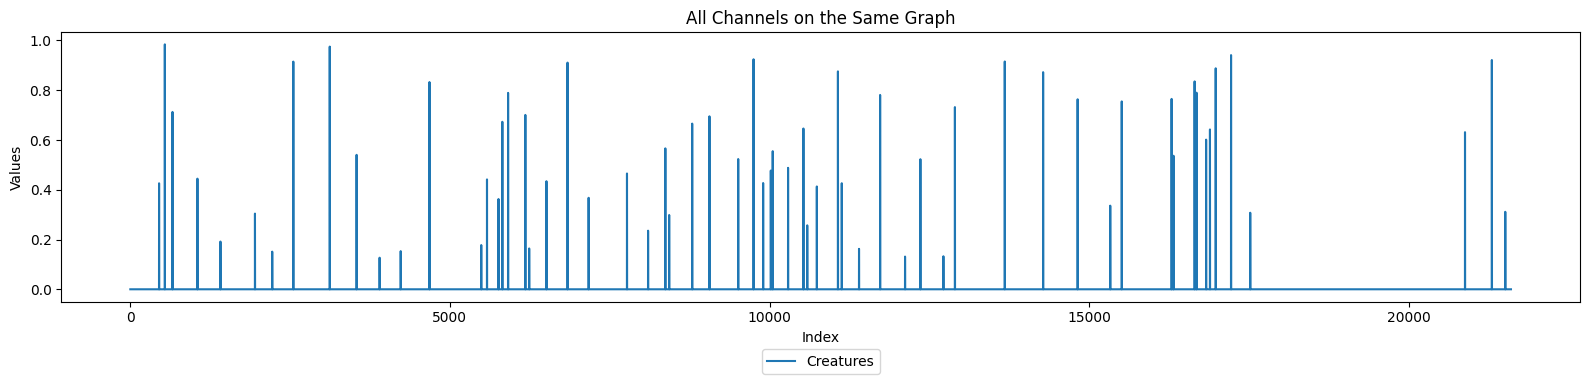

In [21]:
import matplotlib.cm as cm

# Define the number of unique colors equal to the number of columns
colors = cm.get_cmap('tab20', len(new_df.columns))  # Using 'tab10' colormap (or any other colormap)

# Create a single plot for all columns
fig, ax1 = plt.subplots(figsize=(16, 4))

# Loop through each column and plot on the same graph
for idx, column in enumerate(new_df.columns):
    ax1.plot(new_df.index, new_df[column], color=colors(idx), label=column)

# Set labels for the x and y axes
ax1.set_xlabel('Index')
ax1.set_ylabel('Values')

# Add a combined legend for all columns and place it below the plot
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(new_df.columns))

# Set a title for the plot
plt.title('All Channels on the Same Graph')

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
#plt.savefig("../img/dive.png")

# Display the plot
plt.show()

In [22]:
first_non_zero_index = new_df['Creatures'].ne(0.0).idxmax()

print(f"The first non-zero value is in row: {first_non_zero_index}")

The first non-zero value is in row: 450


In [23]:
count_non_zero = (new_df['Creatures'] > 0.0).sum()

print(f"Total number of values above 0.0: {count_non_zero}")

Total number of values above 0.0: 63


In [24]:
# Save the new DataFrame as a CSV file
output_path = './data/creatures_01.csv'
new_df.to_csv(output_path, index=False)